In [1]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.svm import SVC ,LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [2]:

print('SVM')

files = glob.glob("../stock_dataset_with_label/2330/ask/*")
data = pd.read_csv(files[0], index_col=None)
data = data.drop(columns=['matchPri','openPri','bidPri1','bidPri2','bidPri3','bidPri4','bidPri5','askPri1','askPri2','askPri3','askPri4','askPri5'])


files = files[1:]

for f in files:
    d = pd.read_csv(f, index_col=None)
    d = d.drop(columns=['matchPri','openPri','bidPri1','bidPri2','bidPri3','bidPri4','bidPri5','askPri1','askPri2','askPri3','askPri4','askPri5'])
    data = pd.concat([data,d])

print(data.shape)


SVM
(527175, 12)


In [3]:
length = len(data)
train_length = int(length*7/10)
train_data = data[:train_length]
X_train = train_data.drop(columns=['label'])
y_train = train_data['label'].to_numpy()

test_data = data[train_length:]
X_test = test_data.drop(columns=['label'])
y_test = test_data['label'].to_numpy()

print(len(X_train))
print(len(X_test))

369022
158153


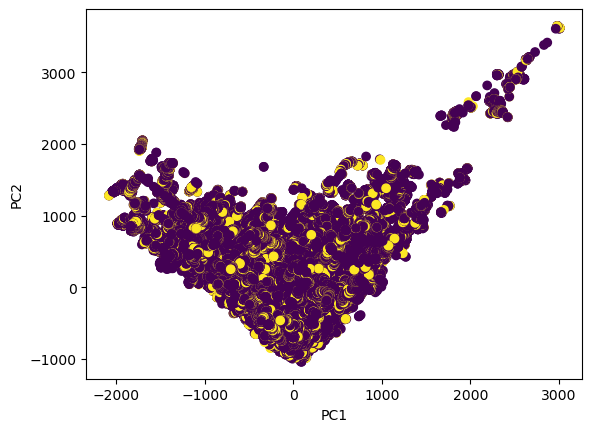

In [4]:
# 確認是否為線性
# 降維
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# 繪製散點圖
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [5]:
# 提高維度 使其變線性
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_features = rbf_feature.fit_transform(X_train)
X_test_features = rbf_feature.transform(X_test)

In [6]:
X_train_features.shape

(369022, 100)

In [9]:
#　SVM 的一種 
model = SGDClassifier(max_iter=100, class_weight='balanced')
model.fit(X_train_features, y_train)

SGDClassifier(class_weight='balanced', max_iter=100)

In [ ]:
# model = LinearSVC(random_state=1,C=0.1, class_weight='balanced',dual =False ,max_iter=10000,verbose=1,tol=1e-5)
# model.fit(X_train, y_train) 

[LibLinear]

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=10000,
          random_state=1, tol=1e-05, verbose=1)

In [10]:
pred = model.predict(X_test_features)
print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
print(accuracy_score(y_test, pred))

Precision Score: 17.50%
Recall Score: 22.11%
F1 score: 19.54%
0.683565914019968
